Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and remove every line containing the expression: "raise ..." (if you leave such a line your code will not run).

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!!!

Fill in your name and id number (numero matricola) below:

In [1]:
NAME = "Gioel Adriano Vencato"
ID_number = int("2005829")

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

## HOMEWORK #3

### Non linear models for classification 

In this notebook we are going to explore the use of SVM and Neural Networks for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

In [2]:
# Load the required packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

np.random.seed(ID_number)

In [3]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
## Load data from https://www.openml.org/d/554
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(f'Each image is represented as vector of shape {X[0].shape}')
print(f'The image is represented in gray scale levels {X[0]}')
print(f'Here it is a label: {Y[0]}')

# Rescale the data
X = X / 255.

Each image is represented as vector of shape (784,)
The image is represented in gray scale levels [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.

In a classification problem it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
We can achieve this by setting the “stratify” argument of the function "train_test_split" to the Y component of our dataset.

We are going to use 500 samples in the train dataset, the remaining ones are used for testing.

In [4]:
from sklearn.model_selection import train_test_split

m_t = 500
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 500, Labels and frequencies: 
 [('0', 49), ('1', 56), ('2', 50), ('3', 51), ('4', 49), ('5', 45), ('6', 49), ('7', 52), ('8', 49), ('9', 50)]
Lenght test dataset: 69500, Labels and frequencies: 
 [('0', 6854), ('1', 7821), ('2', 6940), ('3', 7090), ('4', 6775), ('5', 6268), ('6', 6827), ('7', 7241), ('8', 6776), ('9', 6908)]


In [5]:
# Function to plot a digit and print the corresponding label
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print(f"LABEL: {labels[index]}")
    return

INPUT:


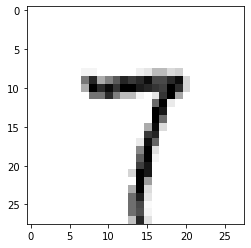

LABEL: 7
INPUT:


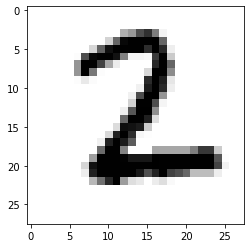

LABEL: 2


In [6]:
#let's try the plotting function
plot_digit(x_train, y_train, 100)
plot_digit(x_test, y_test, 40000)

## TO DO 1
SVM with cross validation to pick the best model. Use SVC from sklearn.svm and GridSearchCV from sklearn.model_selection (5-fold cross-validation).

Print the best parameters found as well as the best score obtained by the 'optimal' model.
Choose the grid, depending on the kernel you are using different hyper-parameters are needed (C, gamma, ...). 
You do not need to use more than 5 values for each hyper-parameter (otherwise the cell could be very slow). 

In [7]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV


def compute_best_SVM_with_CV(kernel_type : str, parameters : dict, x_train : np.ndarray, y_train : np.ndarray) -> tuple:
    '''
    Use Cross validation to find the best SVM on the given parameters. Return the best parameters set together with 
    the corresponding score. Return also the scores for all the other parameters given as input.
    :param kernel_type: Type of kernel (i.e. linear, rbf, poly)
    :param parameters: Dict containing kernel parameters (e.g. {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], ...})
    :param x_train: Train dataset
    :param y_train: Train labels
    
    :returns: (best_param, best_score, all_scores)
        WHERE:
        best_param: best parameter set (this is a dictionary)
        best_score: best score obtained for the given parameters (float)
        all_scores: all scores computed for each parameter (np.ndarray)
    '''
    SVM_model = SVC(kernel=kernel_type)
    # Use GridSearchCV to find the best parameter set.
    # YOUR CODE HERE
    classifier = GridSearchCV(SVM_model, parameters)
    classifier.fit(x_train, y_train)

    print('#####################################')
    print(f'RESULTS for {kernel_type} KERNEL\n')
    # Store the best parameters set and print them
    print("Best parameters set found:")
    best_param = None
    # YOUR CODE HERE
    best_param = classifier.best_params_
    print(best_param)
    
    # Store and print the score of the best parameters set
    print("\nScore with best parameters:")
    best_score = None
    # YOUR CODE HERE
    best_score = classifier.best_score_
    print(best_score)
    
    # Store and print all the scores for the given parameters (average of the validation scores)
    print("\nAll scores on the grid:")
    all_scores = None
    # YOUR CODE HERE
    all_scores = classifier.cv_results_['mean_test_score']
    print(all_scores)
    
    return best_param, best_score, all_scores

# Choose the grid for parameters of the linear SVM kernel
linear_parameters = None
# YOUR CODE HERE
linear_parameters = {'C': np.logspace(0,3,4)} # 'C': [1, 10, 100, 1000]
best_param_lin, best_score_lin, all_scores_lin = compute_best_SVM_with_CV('linear', linear_parameters, x_train, y_train)
# Choose the grid for parameters of the rbf SVM kernel
rbf_parameters = None
# YOUR CODE HERE
rbf_parameters = {'C': np.logspace(0,3,4), 'gamma': [0.01, 0.001]}
best_param_rbf, best_score_rbf, all_scores_rbf = compute_best_SVM_with_CV('rbf', rbf_parameters, x_train, y_train)
# Choose the grid for parameters of the poly SVM kernel (do not forget to choose the degree)
poly_parameters = None
# YOUR CODE HERE
poly_parameters = {'C': np.logspace(0,3,4), 'degree' : [2,3], 'gamma': [0.01, 0.001]}
best_param_poly, best_score_poly, all_scores_poly = compute_best_SVM_with_CV('poly', poly_parameters, x_train, y_train)

#####################################
RESULTS for linear KERNEL

Best parameters set found:
{'C': 1.0}

Score with best parameters:
0.86

All scores on the grid:
[0.86 0.86 0.86 0.86]
#####################################
RESULTS for rbf KERNEL

Best parameters set found:
{'C': 10.0, 'gamma': 0.01}

Score with best parameters:
0.892

All scores on the grid:
[0.878 0.708 0.892 0.866 0.892 0.868 0.892 0.868]
#####################################
RESULTS for poly KERNEL

Best parameters set found:
{'C': 10.0, 'degree': 2, 'gamma': 0.01}

Score with best parameters:
0.8640000000000001

All scores on the grid:
[0.822 0.112 0.698 0.112 0.864 0.4   0.806 0.112 0.862 0.822 0.81  0.288
 0.862 0.864 0.81  0.698]


In [8]:
assert type(best_param_rbf) == dict
assert type(best_score_rbf) == np.float64
assert np.prod(np.array([len(params) for params in rbf_parameters.values()])) == len(all_scores_rbf)


In [9]:
# TODO 2: 
# Get training and test error for the best SVM model obtained from CV (you need to choose across different kernels 
# too). You just need to look at the best model for each kernel and choose the best one (you can do this by hand).

best_kernel_type, best_parameters = None, None
# YOUR CODE HERE
scores_list  = [best_score_lin, best_score_rbf, best_score_poly] # List of all the best scores
params_list  = [best_param_lin, best_param_rbf, best_param_poly] # List of all the best set of parameters
kernels_list = ['linear', 'rbf', 'poly'] # List of Kernels
index_max = np.argmax(scores_list) # Index 'i' (from 0 to 2) such that scores_list[i] is the max score.
best_parameters  = params_list[index_max] # Best set of parameters 
best_kernel_type = kernels_list[index_max] # Kernel with the best score (RBF)

best_SVM = SVC(kernel=best_kernel_type, **best_parameters)
best_SVM.fit(x_train, y_train)

# Compute training and test error for this model (use the usual sklearn built-in functions)
training_error, test_error = None, None
# YOUR CODE HERE
training_error = 1 - best_SVM.score(x_train, y_train) # Compute error on the training dataset using RBF(in this case) SVM
test_error = 1 - best_SVM.score(x_test, y_test) # Compute error on the test dataset using RBF(in this case) SVM

print (f"Best SVM training error: {training_error}")
print (f"Best SVM test error: {test_error}")

Best SVM training error: 0.0
Best SVM test error: 0.10152517985611509


In [10]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


### TO DO 3
Now we use feed-forward neural networks for classification. You can use the Multi-Layer-Perceptron (the multi-layer structure we have seen in class, see http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

Note that we fix the starting random state so to make the runs reproducible. Use max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1. Pick few architectures and use the default activation function (ReLU).

In [11]:
# test different architectures: 
# - 1 hidden layer with 10 nodes, 
# - 1 hidden layer with 50 nodes, 
# - 2 hidden layer with 10 nodes each, 
# - 2 hidden layer with 50 nodes each
# feel free to change this and test more/different structures

parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (70,), (70,70)]}

mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number, learning_rate_init=.1)

# Use GridSearchCV to find the best mlp using 5 fold CV.
mlp_CV = None
# YOUR CODE HERE
mlp_CV = GridSearchCV(mlp, param_grid=parameters, cv=5)
mlp_CV.fit(x_train,y_train)
print('#####################################')
print ('RESULTS FOR NN\n')
# Store the best parameters set and print them
print("Best parameters set found:")
mlp_best_param = None
# YOUR CODE HERE
mlp_best_param = mlp_CV.best_params_
print(mlp_best_param)

# Store and print the score of the best parameters set
print("\nScore with best parameters:")
mlp_best_score = None
# YOUR CODE HERE
mlp_best_score = mlp_CV.best_score_
print(mlp_best_score)

# Store and print all the scores for the given parameters (average of the validation scores)
print("\nAll scores on the grid:")
mlp_all_scores = None
# YOUR CODE HERE
mlp_all_scores = mlp_CV.cv_results_['mean_test_score']
print(mlp_all_scores)

#####################################
RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (70,)}

Score with best parameters:
0.866

All scores on the grid:
[0.832 0.864 0.732 0.858 0.866 0.856]


In [12]:
assert type(mlp_best_param) == dict
assert type(mlp_best_score) == np.float64

## TO DO 4


Now get training and test error for a NN with best parameters from above. We use verbose=True
in input so to see how loss changes in iterations (see how this changes if the number of iterations is changed)

Iteration 1, loss = 2.27833517
Iteration 2, loss = 1.64917956
Iteration 3, loss = 0.99983725
Iteration 4, loss = 0.60671830
Iteration 5, loss = 0.42706384
Iteration 6, loss = 0.33127665
Iteration 7, loss = 0.25127281
Iteration 8, loss = 0.22748342
Iteration 9, loss = 0.16266401
Iteration 10, loss = 0.12885175
Iteration 11, loss = 0.10717159
Iteration 12, loss = 0.08134904
Iteration 13, loss = 0.06545889
Iteration 14, loss = 0.05347611
Iteration 15, loss = 0.04547696
Iteration 16, loss = 0.03825927
Iteration 17, loss = 0.03175075
Iteration 18, loss = 0.02720439
Iteration 19, loss = 0.02400180
Iteration 20, loss = 0.02161582
Iteration 21, loss = 0.01948545
Iteration 22, loss = 0.01801167
Iteration 23, loss = 0.01671830
Iteration 24, loss = 0.01545773
Iteration 25, loss = 0.01452570
Iteration 26, loss = 0.01372556
Iteration 27, loss = 0.01292764
Iteration 28, loss = 0.01222874
Iteration 29, loss = 0.01164962
Iteration 30, loss = 0.01119708
Iteration 31, loss = 0.01067638
Iteration 32, los

(Text(0.5, 0, 'Iter'), Text(0, 0.5, 'Loss'))

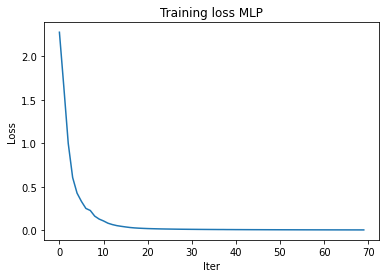

In [13]:
# Get training and test error for the best NN model from CV
max_iter = 300
mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number,
                    learning_rate_init=.1, verbose=True)

# ADD CODE: FIT MODEL & COMPUTE TRAINING AND TEST ERRORS
training_error, test_error = None, None
# YOUR CODE HERE
mlp.fit(x_train,y_train)
training_error = 1 - mlp.score(x_train, y_train) # Compute training error using mlp with 1 hidden layer with 50 nodes
test_error = 1 - mlp.score(x_test, y_test) # Compute test error using mlp with 1 hidden layer with 50 nodes

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Training loss MLP')
plt.xlabel('Iter'), plt.ylabel('Loss')

In [14]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


## TO DO  5
Write a function to find and plot the first digit (in x_test) that is missclassified by NN and correctly classified by SVM.

Write a function to compute the confusion matrix for the predictions of a model (on testset). If you are not familiar with what a confusion matrix is, have a look at this link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html . You are not allowed to use sklearn to create the confusion matrix BUT you can compare your solution with the sklearn implementation to check you wrote it right (see assert checks). 

INPUT:


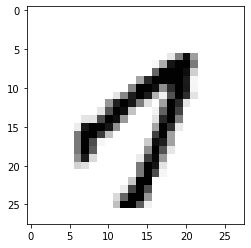

LABEL: 7
The digit: 7 was predicted as: 7 from SVM and as: 3 from NN
SVM confusion matrix: [[6595    1   15   25   13   29  127   14   33    2]
 [   0 7534   58   23    5   18   10    7  152   14]
 [  71   78 5935  131  148   18  155  211  152   41]
 [  21   73  155 6171   10  360   25   80  145   50]
 [   8   75   16    4 6172   12   79   32   17  360]
 [ 123   34   32  163   85 5506  135   44   92   54]
 [  63   33   53    7   36   71 6485    0   79    0]
 [  13  158   77   38   78    4    3 6645   21  204]
 [  56   87  186  300   54  295   50   42 5447  259]
 [  61   79   17  115  364   43   14  239   22 5954]]
MLP confusion matrix: [[6463    0   38   63   16   76  123   28   41    6]
 [   1 7269  136   23   13   46   10   10  301   12]
 [  70   90 5776  195  152   25  187  211  155   79]
 [  80   51  248 5871    9  415   46  120  179   71]
 [   6   68   26   33 5905   20  102   24   30  561]
 [ 266   29   67  158  191 5059  171   64  194   69]
 [  67   27  105   22  122   68 6281  

(Text(0.5, 1.0, 'SVM'), Text(0.5, 1.0, 'MLP'))

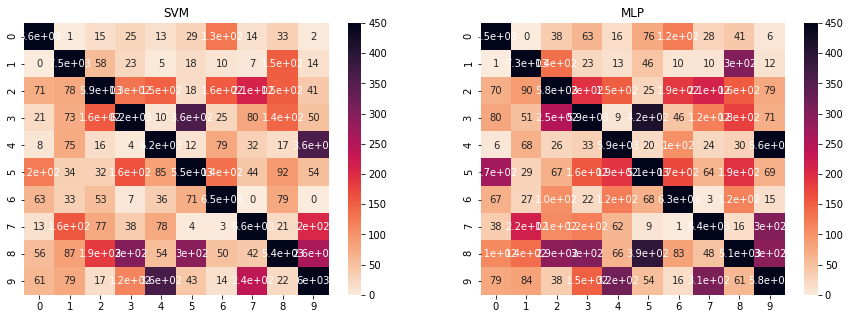

In [15]:
def find_and_print_first_mismatched_prediction(SVM_prediction : np.ndarray, NN_prediction : np.ndarray,
                                               x_test : np.ndarray, y_test : np.ndarray) -> int:
    '''
    Function to find and print the first digit that is missclassified by NN and correctly classified by SVM.
    :param SVM_prediction: SVM predicitons.
    :param NN_prediction: MLP predicitons.
    :param x_test: Test set inputs.
    :param y_test: Test set labels.
    
    :returns:
        i: returns the first index in which there is a mismatch between NN_prediction and true labels but no mismatch 
           between SVM_prediction and true labels. 
    '''
    i = 0
    found = False
    while ((not found) and (i<len(y_test))):
        # YOUR CODE HERE
        if (SVM_prediction[i] == y_test[i] and NN_prediction[i] != y_test[i]): # Digit misclassified by NN and correctly classified by SVM
          found = True
        else:
          i = i + 1
    if (found == False):
      i = -1
      print("All digits are correctly classified using SVM and NN")
    else:
      plot_digit(x_test, y_test, i)
      print(f"The digit: {y_test[i]} was predicted as: {SVM_prediction[i]} from SVM and as: {NN_prediction[i]} from NN")
    return i
    
  
def confusion_matrix_by_hand(true_labels : np.ndarray, predicted_labels : np.ndarray) -> np.ndarray:
    '''
    Function used to compute the confusion matrix given true and predicted labels. 
    :param true_labels: True labels.
    :param predicted_labels: Predicted labels (note this function does not require to know which model generated 
                             the predictions).
    
    :returns:
        confusion_matrix: Confusion matrix for the given true and predicted labels.
    '''

    labels = np.unique(true_labels)
    map_labels_to_index = {label:i for i, label in enumerate(labels)}
    confusion_matrix = np.zeros((len(labels), len(labels)))
    # YOUR CODE HERE
    
    for i in range(0,true_labels.shape[0]):
      true = true_labels[i] # True label
      pred = predicted_labels[i] # Predicted label
      confusion_matrix[map_labels_to_index[str(true)]][map_labels_to_index[str(pred)]] += 1 # If true label is 'i' but the predicted label is 'j' then confusion_matrix[i][j] += 1 

    return confusion_matrix.astype(int)

# Let's test our functions
SVM_prediction = best_SVM.predict(x_test)
NN_prediction = mlp.predict(x_test)

first_index = find_and_print_first_mismatched_prediction(SVM_prediction, NN_prediction, x_test, y_test)

SVM_CM = confusion_matrix_by_hand(y_test, SVM_prediction)
MLP_CM = confusion_matrix_by_hand(y_test, NN_prediction)

print(f'SVM confusion matrix: {SVM_CM}')
print(f'MLP confusion matrix: {MLP_CM}')

# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
SVM_CM_df = pd.DataFrame(SVM_CM, index = labels, columns = labels)
MLP_CM_df = pd.DataFrame(MLP_CM, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(SVM_CM_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=450)
sn.heatmap(MLP_CM_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=450)
axes[0].set_title('SVM'), axes[1].set_title('MLP')

In [16]:
from sklearn.metrics import confusion_matrix
skl_confusion_matrix_SVM = confusion_matrix(y_test, SVM_prediction)
skl_confusion_matrix_NN = confusion_matrix(y_test, NN_prediction)
assert np.sum(skl_confusion_matrix_SVM - SVM_CM) == 0
assert np.sum(skl_confusion_matrix_NN - MLP_CM) == 0


In [17]:
''' 
For the row 'i' of the confusion matrix, if more than threshold% of the total number of digit 'i' are wrongly classified
then i consider the digit 'i' more likely to make mistakes and i append it to the list 'classes'
'''
def digits_more_likely_mistakes(conf_matrix, threshold):
  row_tot = np.zeros(10) # Total number of digits(element in position 'i' will contain the total number of 'i')
  row_wrong = np.zeros(10) # Number of misclassified digits
  classes = list() # Classes more likely to make mistakes
  for i in range(0,10):
    for j in range(0,10):
      row_tot[i] += conf_matrix[i][j]
      if (i != j):
        row_wrong[i] += conf_matrix[i][j]
    if (row_wrong[i]/row_tot[i] > threshold):
      classes.append(i)
  return classes
print(f'The classes which are more likely to make mistakes (RBF SVM) are: {digits_more_likely_mistakes(SVM_CM,0.13)}')
print(f'The classes which are more likely to make mistakes (MLP) are: {digits_more_likely_mistakes(MLP_CM,0.13)}')

The classes which are more likely to make mistakes (RBF SVM) are: [2, 8, 9]
The classes which are more likely to make mistakes (MLP) are: [2, 3, 5, 8, 9]


## TO DO 6: explain the results you got (max 5 lines)
According to the cross-validation results, would you choose SVMs or NNs when 500 data points are available for training? Is this a good choice, given the results on the test set?

Looking at the confusion matrices what to do you observe? On which classes each model is more likely to make mistakes? 

(Answer in the next cell, no need to add code)

In [18]:
# YOUR CODE HERE
# ANSWER IN THE NEXT CELL

$\bf{ANSWER}$

By looking at the cross-validation results, i would choose SVMs since, for the choice of the parameters: kernel: RBF, $\gamma$ = 0.01 and $C$ = 10, the average of the validation scores is better with respect to NN$_{best}$. SVMs represents a good choice beacuse, for those hyperparameters, once it has been trained on the entire training dataset ($m_{Training}$ = 500), its error on the test dataset is the lowest. Indeed $\hat{L_D}$(SVM$_{best}$) $\approx$ 0.10 < $\hat{L_D}$(NN$_{best}$) $\approx$ 0.14.
In the cell above it is possible to note that SVMs model is more likey to make mistakes(i set the threshold=0.13) on the classes {2,8,9} and NN on the classes {2,3,5,8,9} therefore both models are more likely to make mistakes on the classes {2,8,9}.

## More Data

Now let's do the same but using more data points for training SVM and NN. For SVM we are going to use the best hyperparameters set (kernel, C, gamma, ...) found using 500 data points. For NNs we use the same best architecture as before, but you can try more if you want! 

In [19]:
#let restart the random generator with the given seed
np.random.seed(ID_number)

m_t = 60000
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)
print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 60000, Labels and frequencies: 
 [('0', 5917), ('1', 6752), ('2', 5991), ('3', 6121), ('4', 5849), ('5', 5411), ('6', 5894), ('7', 6251), ('8', 5850), ('9', 5964)]
Lenght test dataset: 10000, Labels and frequencies: 
 [('0', 986), ('1', 1125), ('2', 999), ('3', 1020), ('4', 975), ('5', 902), ('6', 982), ('7', 1042), ('8', 975), ('9', 994)]


In [20]:
# As we did with the first HW let's use a decorator to measure time 
from collections import defaultdict
running_times = defaultdict(list)

def measure_time(function):
    def wrap(*args, **kw):
        import time 
        t_start = time.time()
        result = function(*args, **kw)
        t_end = time.time()
        running_times[type(args[0]).__name__].append(t_end - t_start)
        return result
    return wrap

@measure_time
def fit_classification_model(model, x_train, y_train):
    model.fit(x_train, y_train)

In [21]:
n_data = [250, 500, 1000, 2000, 5000, 7500]
svm_train_err, svm_test_err = [], [] 
mlp_train_err, mlp_test_err = [], [] 
for n in n_data: 
    print(f'Processing with {n} data ...')
    # Initialize models according to the best we got using 500 data
    svm = SVC(kernel=best_kernel_type, **best_parameters)
    mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, 
                        random_state=ID_number, learning_rate_init=.1)
    # fit svc
    fit_classification_model(svm, x_train[:n], y_train[:n])
    # get svc train and test error
    svm_train_err.append(1. - svm.score(x_train[:n], y_train[:n]))
    svm_test_err.append(1. - svm.score(x_test, y_test))

    # fit mlp
    fit_classification_model(mlp, x_train[:n], y_train[:n])
    # get mlp train and test error
    mlp_train_err.append(1. - mlp.score(x_train[:n], y_train[:n]))
    mlp_test_err.append(1. - mlp.score(x_test, y_test))

Processing with 250 data ...
Processing with 500 data ...
Processing with 1000 data ...
Processing with 2000 data ...
Processing with 5000 data ...
Processing with 7500 data ...


(<matplotlib.legend.Legend at 0x7fd6b2d79f60>, Text(0.5, 1.0, 'Training Time'))

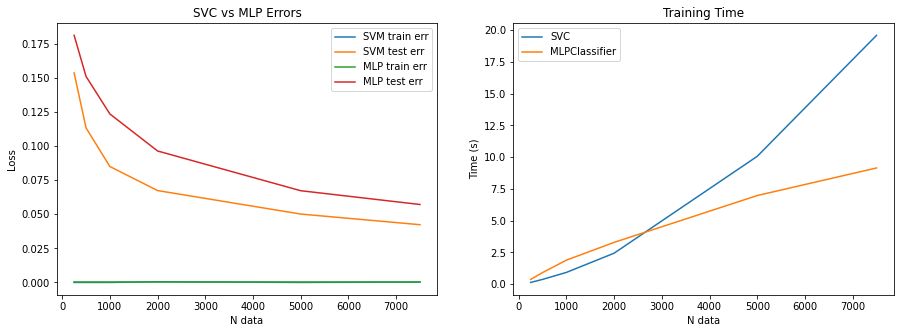

In [22]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(n_data, np.array(svm_train_err), label='SVM train err')
axes[0].plot(n_data, np.array(svm_test_err), label='SVM test err')
axes[0].plot(n_data, np.array(mlp_train_err), label='MLP train err')
axes[0].plot(n_data, np.array(mlp_test_err), label='MLP test err')
axes[0].set_xlabel('N data'), axes[0].set_ylabel('Loss')
axes[0].legend(), axes[0].set_title('SVC vs MLP Errors')

for model, times in running_times.items():
    axes[1].plot(n_data, times, label=model)
axes[1].set_xlabel('N data'), axes[1].set_ylabel('Time (s)')
axes[1].legend(), axes[1].set_title('Training Time')

# TODO 7: Complete dataset
Just for comparison, since it may not be possible to learn a SVM on too many data (due to time and memory complexity issues, see previous plots), let's use logistic regression (with standard parameters from scikit-learn but the number of iteration).

In [23]:
from sklearn import linear_model

# Fit and test a logistic regression model
max_iter = 1000
log_reg = None
training_error_lr, test_error_lr = None, None
# YOUR CODE HERE
log_reg = linear_model.LogisticRegression(max_iter = max_iter)
log_reg.fit(x_train,y_train)
training_error_lr = 1 - log_reg.score(x_train,y_train) 
test_error_lr = 1 - log_reg.score(x_test,y_test) 

print (f"Best logistic regression training error: {training_error_lr:.4f}")
print (f"Best logistic regression test error: {test_error_lr:.4f}")

Best logistic regression training error: 0.0597
Best logistic regression test error: 0.0850


We now learn the NN. Below we use the same best architecture as before (found with 500 data), feel free to try larger ones (and to use again CV), or smaller ones if it takes too much time. (We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration). 

*Note*: If you do again CV to choose the best architecture remember to save the best set of parameters into the variable: "mlp_best_param".

In [24]:
#get training and test error for the best NN model from CV
best_mlp_large = None
training_error, test_error = None, None
# YOUR CODE HERE
parameters_large = {'hidden_layer_sizes': [(70,), (80,)]} # Parameters: 1 hidden layer with 70 nodes, 1 hidden layer with 80 nodes
mlp_large = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number, learning_rate_init=.1)
mlp_CV_large = GridSearchCV(mlp_large, parameters_large)
mlp_CV_large.fit(x_train, y_train)
mlp_best_param = mlp_CV_large.best_params_

best_mlp_large = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number,
                    learning_rate_init=.1, verbose=True)
best_mlp_large.fit(x_train,y_train)
training_error = 1 - best_mlp_large.score(x_train, y_train)
test_error = 1 - best_mlp_large.score(x_test, y_test)

print("Best parameters set found:") # Best parameter found using cv
print(mlp_best_param)
print (f"Best NN training error: {training_error:.4f}")
print (f"Best NN test error: {test_error:.4f}")

Iteration 1, loss = 0.30020026
Iteration 2, loss = 0.13069122
Iteration 3, loss = 0.09524417
Iteration 4, loss = 0.07557147
Iteration 5, loss = 0.06171087
Iteration 6, loss = 0.05365245
Iteration 7, loss = 0.04511118
Iteration 8, loss = 0.03869643
Iteration 9, loss = 0.03387110
Iteration 10, loss = 0.02908517
Iteration 11, loss = 0.02634451
Iteration 12, loss = 0.02154291
Iteration 13, loss = 0.01919828
Iteration 14, loss = 0.01543641
Iteration 15, loss = 0.01367953
Iteration 16, loss = 0.01104157
Iteration 17, loss = 0.00934440
Iteration 18, loss = 0.00810892
Iteration 19, loss = 0.00713901
Iteration 20, loss = 0.00597654
Iteration 21, loss = 0.00524512
Iteration 22, loss = 0.00440897
Iteration 23, loss = 0.00382188
Iteration 24, loss = 0.00356265
Iteration 25, loss = 0.00297041
Iteration 26, loss = 0.00272154
Iteration 27, loss = 0.00247550
Iteration 28, loss = 0.00232156
Iteration 29, loss = 0.00213616
Iteration 30, loss = 0.00201681
Iteration 31, loss = 0.00191920
Iteration 32, los

In [25]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


(Text(0.5, 1.0, 'MLP Train'), Text(0.5, 1.0, 'MLP Test'))

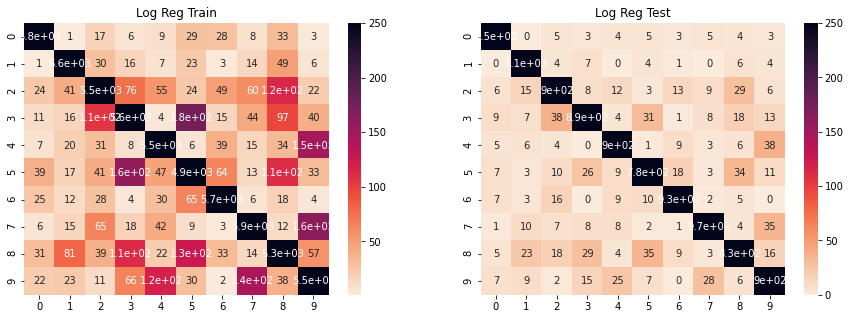

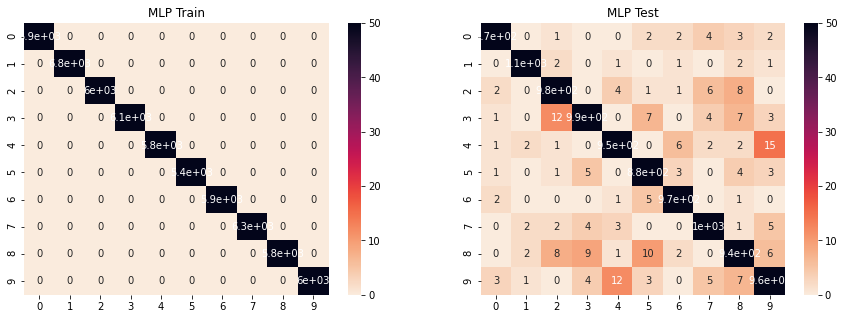

In [26]:
## TODO 8: compute the confusion matrices both on train and test set for Logistic regression (trained on 60k)
# and MLP (trained on 60k).

# Log Reg Confusion matrices
log_reg_CM_train, log_reg_CM_test = None, None
# YOUR CODE HERE
log_reg_CM_train = confusion_matrix_by_hand(y_train, log_reg.predict(x_train)) # Compute confusion matrix on train set for Logistic Regression
log_reg_CM_test = confusion_matrix_by_hand(y_test, log_reg.predict(x_test)) # Compute confusion matrix on test set for Logistic Regression
# mlp
mlp_CM_train, mlp_CM_test = None, None
# YOUR CODE HERE
mlp_CM_train = confusion_matrix_by_hand(y_train, best_mlp_large.predict(x_train)) # Compute confusion matrix on train set for MLP
mlp_CM_test = confusion_matrix_by_hand(y_test, best_mlp_large.predict(x_test)) # Compute confusion matrix on test set for MLP


# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
log_reg_CM_train_df = pd.DataFrame(log_reg_CM_train, index = labels, columns = labels)
log_reg_CM_test_df = pd.DataFrame(log_reg_CM_test, index = labels, columns = labels)

mlp_CM_train_df = pd.DataFrame(mlp_CM_train, index = labels, columns = labels)
mlp_CM_test_df = pd.DataFrame(mlp_CM_test, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(log_reg_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=250)
sn.heatmap(log_reg_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=250)
axes[0].set_title('Log Reg Train'), axes[1].set_title('Log Reg Test')

fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(mlp_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=50)
sn.heatmap(mlp_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=50)
axes[0].set_title('MLP Train'), axes[1].set_title('MLP Test')

In [27]:
assert log_reg_CM_train.shape == (10, 10)
assert log_reg_CM_test.shape == (10, 10)
assert mlp_CM_train.shape == (10, 10)
assert mlp_CM_test.shape == (10, 10)


## TO DO 9
Compare and discuss:
- compare the computational time required to fit a SVM and a MLP. Which is faster as the number of data increase? Why? Can you apply both methods in the high data regime?
- the results from SVM m=7500 and NN with m=60000 training data points.
- the results from NN with m=500 and m=60000 training data points.
- What do you observe in the confusion matrices? Which are the hardest classes? Are the hardest and easiest classes the same both for mlp and logistic regression?

(Answer in the next cell, no need to write code)

In [28]:
# YOUR CODE HERE
# ANSWER IN THE NEXT TWO CELLS

In [29]:
print(f"SVM (m=7500) test error: {svm_test_err[-1]:.4f}")
print(f"NN (m=500) test error: {mlp_test_err[0]:.4f}")
print(f"NN (m=60000) test error: {test_error:.4f}")
print(f'The classes which are more likely to make mistakes (Log Reg on training dataset) are: {digits_more_likely_mistakes(log_reg_CM_train,0.07)}')
print(f'The classes which are more likely to make mistakes (Log Reg on test dataset) are: {digits_more_likely_mistakes(log_reg_CM_test,0.1)}')
print(f'The classes which are more likely to make mistakes (MLP on test dataset) are: {digits_more_likely_mistakes(mlp_CM_test,0.03)}')
# Easiest classes 
# (for log_reg i consider that class 'i' is easy to be classified if misclassified digits < 6%)
# (for mlp i consider that class 'i' is easy to be classified if misclassified digits < 2%)
labels = list(i for i in range(0,10)) # List of possible outcomes {0,1,2,...,9}
hard_classes_log_reg = digits_more_likely_mistakes(log_reg_CM_test,0.06) # Not easy classes for log_reg on the test dataset
hard_classes_mlp = digits_more_likely_mistakes(mlp_CM_test,0.02) # Not easy classes for mlp on the test dataset
print(f'The easiest classes(Log Reg on test dataset) are: {list(set(labels)-set(hard_classes_log_reg))}')
print(f'The easiest classes (MLP on test dataset) are: {list(set(labels)-set(hard_classes_mlp))}')

SVM (m=7500) test error: 0.0423
NN (m=500) test error: 0.1810
NN (m=60000) test error: 0.0222
The classes which are more likely to make mistakes (Log Reg on training dataset) are: [2, 3, 5, 8, 9]
The classes which are more likely to make mistakes (Log Reg on test dataset) are: [2, 3, 5, 8]
The classes which are more likely to make mistakes (MLP on test dataset) are: [3, 8, 9]
The easiest classes(Log Reg on test dataset) are: [0, 1, 6]
The easiest classes (MLP on test dataset) are: [0, 1, 5, 6, 7]


$\bf{ANSWER}$

- It seems that the computational time required to fit a SVM is polynomial quadratic. On the other hand, the training time required to fit a MLP seems to be linear. In particular, for a 'reduced' number of data (in this case $m_{Training}$ < 3000) the computational time required to fit the SVM model is less than the one required to fit the NN. However, as the number of data increase, the training of NN (using stochastic gradient descent) is significantly faster than SVM and for this reason it is preferable to use a neural network framework if the number of training data is very large.
- Both SVMs trained with 7500 datapoints and NN trained with 60000 datapoints lead to zero training error. On the test dataset ($m_{Test}$ = 10000) each model performs well and in particular the NN is the one which achieves the smaller test error (0.022). However, the training process on 60000 points of a NN with one hidden layer with 70 nodes (as found using cross-validation) requires some more time with respect to SVM with rbf kernel on 7500 datapoints.
- I observe that overfitting occurs for the Neural Network trained with 500 datapoints. In fact, it fits really well the training data leading to $L_S$ = 0 but wrongly classifies 20% of the handwritten digits coming from the unseen data, since $\hat{L_D}$ $\approx$ 0.18. It is suffice to increase the number of training data to make the model generalize better and prevent overfitting.
-In the confusion matrices i note that, both on the training dataset and test dataset, Logistic Regression is more likely to make mistakes on the classes {2,3,5,8}. Since the Multy layer perceptron (MLP)  correctly classifies all the training data, the corrispective confusion matrix is diagonal. On the test data, MLP is more likely to make mistakes on the classes {3,8,9}. Therefore the common hard classes for both models are {3,8}. On the other hand, the easiest classes in common are {0,1,6}.